In [38]:
# 测试cuda是否可用
import torch
torch.cuda.is_available()

True

### 2.3 线性代数

#### 2.3.1 标量

In [6]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x+y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

#### 2.3.2 向量

In [7]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [8]:
x[3]

tensor(3)

In [9]:
len(x)

4

In [11]:
x.shape

torch.Size([4])

#### 2.3.3 矩阵

In [14]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [16]:
# 转置
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

#### 2.3.4 张量

In [18]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

#### 2.3.5 张量算法

In [19]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [20]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [21]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

#### 2.3.6 降维

In [22]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [23]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [24]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [25]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [26]:
A.sum(axis=[0, 1])

tensor(190.)

In [27]:
# 均值，求和，个数
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

非降维求和

In [28]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [29]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [30]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

#### 2.3.7 点积

In [31]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [32]:
torch.sum(x * y)

tensor(6.)

#### 2.3.8 矩阵-向量积

In [33]:
# x: 4 -> 4x1
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

#### 2.3.9 矩阵-矩阵乘法

In [35]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

#### 2.3.10 范数

性质：

1.缩放因子

$$
f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x}).
$$

2.三角不等式

$$
f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y}).
$$

3.范数必须非负

$$
f(\mathbf{x}) \geq 0.
$$

4.范数最小值为0

$$
\forall i, [\mathbf{x}]_i = 0 \Leftrightarrow f(\mathbf{x})=0.
$$

$L_2$范数：

$$
\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},
$$

In [36]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

$L_1$范数为绝对值和

$$
\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.
$$

In [37]:
torch.abs(u).sum()

tensor(7.)

一般化的表达

$$
\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.
$$

### 2.4 微积分

#### 2.4.1 导数和微分

$$
f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.
$$

In [4]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
import torch

def f(x):
    return 3 * x ** 2 - 4 * x

In [5]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


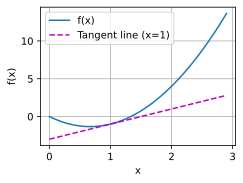

In [6]:
import utils
x = np.arange(0, 3, 0.1)
utils.plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 2.5 自动微分

#### 2.5.2 例子

In [8]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [14]:
x = torch.arange(4.0, requires_grad=True)
x.grad is None

True

In [15]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [16]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [17]:
x.grad == 4 * x

tensor([True, True, True, True])

In [27]:
print(x)
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([0., 1., 2., 3.], requires_grad=True)


tensor([1., 1., 1., 1.])

#### 2.5.2 非标量变量的反向传播

当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括深度学习中）， 但当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和。

In [30]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
print(x, x.grad)
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad == 2 * x

tensor([0., 1., 2., 3.], requires_grad=True) tensor([0., 2., 4., 6.])


tensor([True, True, True, True])

#### 2.5.3 分离计算

有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

这里可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。

In [40]:
x.grad.zero_()
print(x, x.grad)
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([0., 1., 2., 3.], requires_grad=True) tensor([0., 0., 0., 0.])


tensor([True, True, True, True])

In [41]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

#### 2.5.4 Python控制流的梯度计算

使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度。 在下面的代码中，while循环的迭代次数和if语句的结果都取决于输入a的值。

In [42]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c



In [49]:
a = torch.randn(size=(1,5), requires_grad=True)
d = f(a)
d.sum().backward()

In [50]:
a.grad == d / a

tensor([[True, True, True, True, True]])

### 2.6 概率

#### 2.6.1 基本概率论